# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 Campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.isnull().sum()

df.dtypes

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Objective**: The goal is to predict whether a customer will subscribe to a term deposit based on personal and marketing campaign data. This will allow the bank to optimize future marketing efforts by targeting likely responders.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_model = df.drop(columns=['duration'])

# Define features and target
X = df_model.drop('y', axis=1)
y = df_model['y'].map({'yes': 1, 'no': 0}) 

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()



,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [13]:
baseline_accuracy = y_test.value_counts(normalize=True).max()
print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")


Baseline Accuracy (majority class): 0.8874


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Instantiate model
log_reg = LogisticRegression(max_iter=1000)

# Fit model and record time
start = time.time()
log_reg.fit(X_train, y_train)
end = time.time()
log_train_time = end - start


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

In [8]:
# Predict and score
log_train_acc = accuracy_score(y_train, log_reg.predict(X_train))
log_test_acc = accuracy_score(y_test, log_reg.predict(X_test))

print(f"Train Accuracy: {log_train_acc:.4f}")
print(f"Test Accuracy: {log_test_acc:.4f}")
print(f"Train Time: {log_train_time:.4f} seconds")


Train Accuracy: 0.9002
Test Accuracy: 0.9006
Train Time: 5.4763 seconds


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Store models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Compare model performance
results1 = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    train_time = end - start
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    results1.append({
        'Model': name,
        'Train Time': round(train_time, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    })

results1_df = pd.DataFrame(results1)
results1_df


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,6.6523,0.9002,0.9006
1,KNN,0.0108,0.9122,0.8939
2,Decision Tree,0.1393,0.9954,0.8377
3,SVM,7.4830,0.8975,0.8977


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.drop('duration', axis=1, inplace=True)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

edu_order = {
    'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
    'high.school': 4, 'professional.course': 5,
    'university.degree': 6, 'unknown': -1
}
df['education_encoded'] = df['education'].map(edu_order)

for col in ['default', 'housing', 'loan']:
    df[col + '_bin'] = df[col].map({'yes': 1, 'no': 0, 'unknown': -1})

age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

categorical_cols = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome', 'age_group']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.drop(columns=['education', 'default', 'housing', 'loan', 'age'], inplace=True)

X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


def train_and_evaluate(model, model_name):
    start = time.time()
    model.fit(X_train, y_train)
    duration = time.time() - start
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    return {
        'Model': model_name,
        'Train Time': round(duration, 4),
        'Train Accuracy': round(train_acc, 4),
        'Test Accuracy': round(test_acc, 4)
    }

# --- Logistic Regression ---
log_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
log_grid = GridSearchCV(log_pipeline, {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='f1')
log_result = train_and_evaluate(log_grid, 'Logistic Regression')

# --- KNN ---
knn_grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}, cv=5, scoring='accuracy')
knn_result = train_and_evaluate(knn_grid, 'KNN')

# --- Decision Tree ---
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), {'max_depth': [3, 5, 10, 15]}, cv=5, scoring='accuracy')
tree_result = train_and_evaluate(tree_grid, 'Decision Tree')

# --- SVM (no tuning) ---
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
svm_result = train_and_evaluate(svm_pipeline, 'SVM')

results2_df = pd.DataFrame([log_result, knn_result, tree_result, svm_result])
results2_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,4.2138,0.8996,0.9018
1,KNN,6.0657,0.9070,0.9001
2,Decision Tree,1.0581,0.8997,0.9007
3,SVM,41.9846,0.9097,0.9011


/var/folders/7k/s33bvpvd04q3y60x6szp7f2m0000gn/T/ipykernel_52358/276973224.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


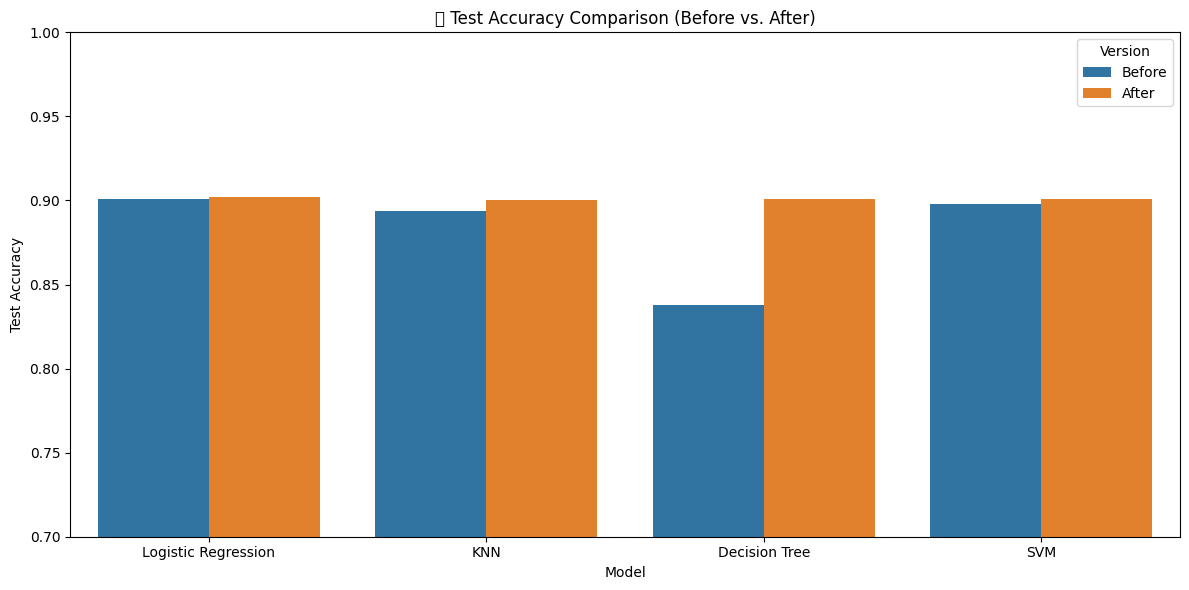

/var/folders/7k/s33bvpvd04q3y60x6szp7f2m0000gn/T/ipykernel_52358/276973224.py:20: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


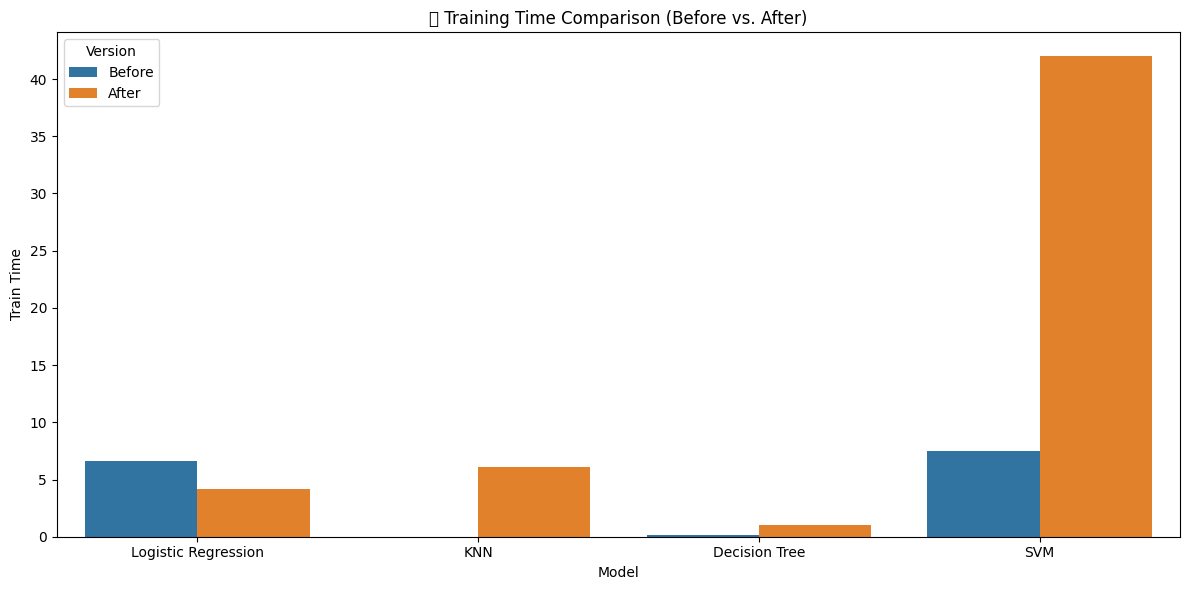

In [ ]:
#version indicator
results1_df['Version'] = 'Before'
results2_df['Version'] = 'After'

# Combine both
combined_df = pd.concat([results1_df, results2_df], ignore_index=True)

# Plot Test Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='Model', y='Test Accuracy', hue='Version')
plt.title('🔍 Test Accuracy Comparison (Before vs. After)')
plt.ylim(0.7, 1)
plt.tight_layout()
plt.show()

# Plot Training Time Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='Model', y='Train Time', hue='Version')
plt.title('⏱️ Training Time Comparison (Before vs. After)')
plt.tight_layout()
plt.show()


In [ ]:
# Extract feature importances from logistic regression
import numpy as np

log_model = log_grid.best_estimator_.named_steps['logisticregression']
features = X_train.columns
coefs = log_model.coef_[0]

# Create dataframe
log_odds_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs
}).sort_values(by='Coefficient', ascending=False)

# Show top positive and negative influences
log_odds_df.head(10)      # features that increase chance


,Feature,Coefficient
4,cons.price.idx,1.302467
7,nr.employed,0.651516
6,euribor3m,0.278412
27,month_aug,0.192363
31,month_mar,0.175739
5,cons.conf.idx,0.143282
40,poutcome_nonexistent,0.135801
41,poutcome_success,0.123796
9,default_bin,0.089539
39,day_of_week_wed,0.057452


[Text(0.5, 0.875, 'nr.employed <= 5087.65\ngini = 0.2\nsamples = 32950\nvalue = [29238, 3712]\nclass = No'),
 Text(0.25, 0.625, 'pdays <= 16.5\ngini = 0.493\nsamples = 3991\nvalue = [2232, 1759]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'day_of_week_mon <= 0.5\ngini = 0.421\nsamples = 990\nvalue = [298, 692]\nclass = Yes'),
 Text(0.0625, 0.125, 'gini = 0.385\nsamples = 788\nvalue = [205.0, 583.0]\nclass = Yes'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 202\nvalue = [93, 109]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 0.5\ngini = 0.458\nsamples = 3001\nvalue = [1934, 1067]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.472\nsamples = 2509\nvalue = [1552, 957]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.347\nsamples = 492\nvalue = [382, 110]\nclass = No'),
 Text(0.75, 0.625, 'cons.conf.idx <= -46.65\ngini = 0.126\nsamples = 28959\nvalue = [27006.0, 1953.0]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'euribor3m <= 1.525\ngi

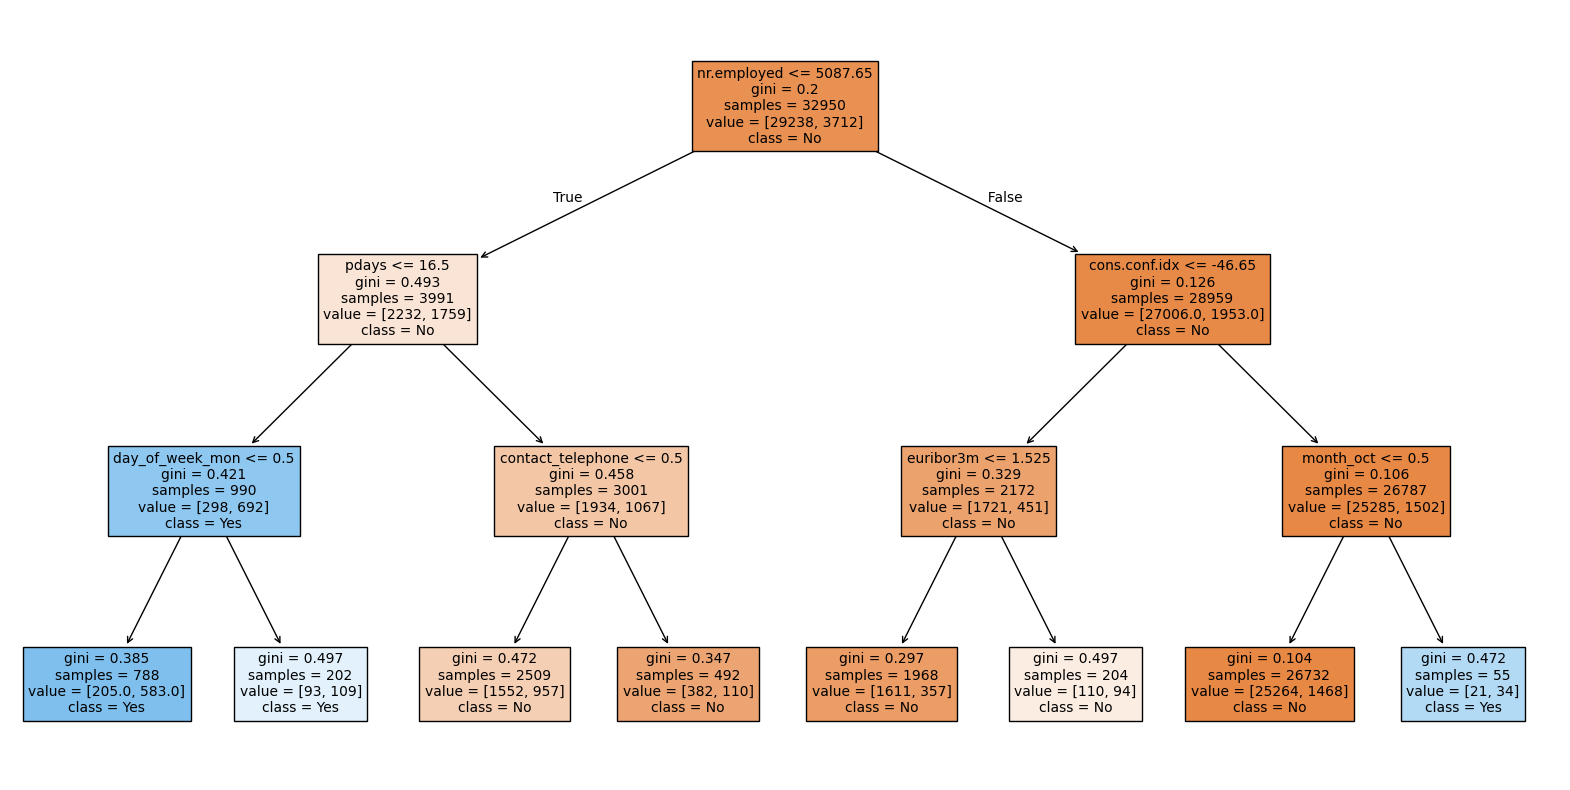

In [17]:
# From best estimator
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_tree = tree_grid.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)


Simpler Way is by looking at Feature Importance 

In [18]:
importances = best_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
7,nr.employed,0.728138
1,pdays,0.130801
5,cons.conf.idx,0.068757
34,month_oct,0.025941
6,euribor3m,0.021492
26,contact_telephone,0.015268
36,day_of_week_mon,0.009604
0,campaign,0.000000
35,month_sep,0.000000
28,month_dec,0.000000


### Insights

| Feature            | DT Importance | LR Coefficient  | Insight                                                                                                                               |
| ------------------ | ------------- | --------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| `nr.employed`      | 0.728         | +0.652          | More individuals employed → higher success rate |
| `cons.price.idx`   | —             | +1.302      | Higher consumer price index correlates with more subscriptions                          |
| `pdays`            | 0.131         | —               | Whether and when the client was previously contacted matters — recent contact boosts conversions.                                     |
| `cons.conf.idx`    | 0.069         | +0.143          | Higher consumer confidence index → higher likelihood to subscribe.                                                                    |
| `euribor3m`        | 0.021         | +0.278          | When interest rates are high, clients are more likely to lock in term deposits.                                                       |                                                                                 |
| `poutcome_success` | —             | +0.124          | Past successful campaigns lead to more conversions                                                       |
